# first codeing practice

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--prompthero--openjourney/snapshots/f4572661b028c732b2b97c8fbdc32fa5db3afe03/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--prompthero--openjourney/snapshots/f4572661b028c732b2b97c8fbdc32fa5db3afe03/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


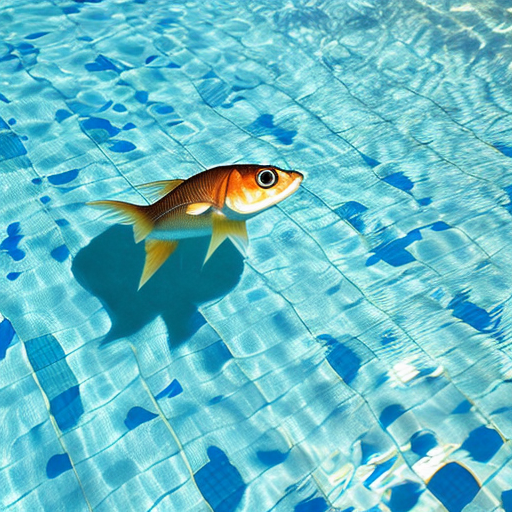

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image saved as output.png


In [8]:
# Install required libraries in Colab
!pip install diffusers transformers accelerate safetensors

from diffusers import StableDiffusionPipeline
import torch

# 🔹 Replace this with a valid Hugging Face model name
MODEL_NAME = "prompthero/openjourney"

# Load the pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_NAME,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)

# Use GPU if available, otherwise fallback to CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

def generate_image(prompt, filename="output.png"):
    """
    Generate an image from a text prompt and save it locally.
    """
    image = pipe(prompt).images[0]
    image.save(filename)
    print(f"✅ Image saved as {filename}")
from PIL import Image
import IPython.display as display

# Open and display the saved image
img = Image.open("output.png")
display.display(img)


# Example usage
generate_image("A small fish in a swimming pool")